In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split # Split data to train and test data(after merging in this case)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')


# import libraries from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
#from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.regularizers import l2

In [3]:
# Import dataset

df = pd.read_csv("TrainingData_Original.csv") #reading the provided dataset
df.head()

,Orientation Loss,Edge Coverage,Average Thickness,Average Separation,Distance Entropy,Zoom,Focus,Contrast
0,1908.657349,22.0302,1.4655,1.9388,0.9664,7000,6.5,68.4286
1,1392.702637,22.8446,1.4270,1.8045,0.9719,7000,7.6,67.6093
2,1516.645508,20.9709,1.5001,2.0243,0.9609,8000,6.7,68.6726
3,2036.614014,21.5271,1.5899,1.9480,0.9793,7000,6.4,68.8666
4,855.029663,21.8735,1.5065,1.9006,0.9804,7000,7.5,67.2779


In [4]:
# Independent variables (features)
X = df[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]

# Target variables
Y = df[['Zoom', 'Focus', 'Contrast']]

In [5]:
# Create a csv file of scaled X and Y and compare with original values to find the scaling factor to apply
# on predicted values
X_copy = X.copy()
Y_copy = Y.copy()

In [6]:
import numpy as np

def jitter_data(X, Y, std=0.01):
    """
    Jitter the data by adding random noise from a normal distribution.
    std=0.01 means the noise is about 1% of the range of each feature/column.
    """
    X_jittered = X + np.random.normal(0, std, X.shape)
    Y_jittered = Y + np.random.normal(0, std, Y.shape)
    
    return X_jittered, Y_jittered

# Augment the training data
X_augmented, Y_augmented = jitter_data(X, Y)

# You can combine the original and augmented data for a larger training set
X_combined = np.vstack([X, X_augmented])
Y_combined = np.vstack([Y, Y_augmented])


In [7]:
# Step 1: Data Splitting
# Split the data into training, validation, and testing sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_combined, Y_combined, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=42)


In [8]:
# Normalizing the data
scaler_X = StandardScaler().fit(X_train)  # Fit only on training data
X_tr = scaler_X.transform(X_train)
X_vl = scaler_X.transform(X_val)
X_tst = scaler_X.transform(X_test)

scaler_Y = StandardScaler().fit(Y_train)  # Fit only on training data
Y_tr = scaler_Y.transform(Y_train)
Y_vl = scaler_Y.transform(Y_val)
Y_tst = scaler_Y.transform(Y_test)

In [9]:
# Step 3: Model Architecture ( Experimenting )
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.00001)),
    tf.keras.layers.Dense(70, activation='relu', kernel_regularizer=l2(0.00001)),
    tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=l2(0.00001)),
    tf.keras.layers.Dense(3, kernel_regularizer=l2(0.00001))  # No activation function for regression
])

In [10]:
# Step 5: Model Training
#model.compile(optimizer='adam', loss=loss_fn)
#model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])  # Use binary crossentropy for multi-label classification
model2.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])  # Use binary crossentropy for multi-label classification
model2.fit(X_tr, Y_tr, epochs=100, batch_size=7, validation_data=(X_vl, Y_vl))


Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 0.8274 - mean_absolute_error: 0.7758 - val_loss: 0.7438 - val_mean_absolute_error: 0.7205
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6824 - mean_absolute_error: 0.6573 - val_loss: 0.6909 - val_mean_absolute_error: 0.6440
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6283 - mean_absolute_error: 0.6023 - val_loss: 0.6542 - val_mean_absolute_error: 0.6346
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5848 - mean_absolute_error: 0.5792 - val_loss: 0.6251 - val_mean_absolute_error: 0.6287
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5579 - mean_absolute_error: 0.5709 - val_loss: 0.5838 - val_mean_absolute_error: 0.6096
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5222 - mean_absolute_error: 0.5537 - val_loss: 0.5697 - val_mean_absolute_error: 0.5896
Epoch 7/100
7/7 [================

7/7 [==============================] - 0s 3ms/step - loss: 0.0936 - mean_absolute_error: 0.1989 - val_loss: 0.4143 - val_mean_absolute_error: 0.4676
Epoch 52/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0874 - mean_absolute_error: 0.1983 - val_loss: 0.4425 - val_mean_absolute_error: 0.4857
Epoch 53/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0931 - mean_absolute_error: 0.2074 - val_loss: 0.4129 - val_mean_absolute_error: 0.4634
Epoch 54/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0834 - mean_absolute_error: 0.1925 - val_loss: 0.4361 - val_mean_absolute_error: 0.4792
Epoch 55/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0839 - mean_absolute_error: 0.1901 - val_loss: 0.4312 - val_mean_absolute_error: 0.4790
Epoch 56/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0840 - mean_absolute_error: 0.1892 - val_loss: 0.4418 - val_mean_absolute_error: 0.4793
Epoch 57/100
7/7 [=======================

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_tst, Y_tst, verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 42.09%
Test loss: 0.4150


In [12]:
# Predict actions on the test set
predicted_actions_probabilities = model2.predict(X_tst)

1/1 [==============================] - 0s 73ms/step


In [13]:
predicted_actions_probabilities

array([[ 0.02560706,  0.8682809 , -0.7587075 ],
       [ 0.19116363, -0.43897843, -2.5449667 ],
       [ 0.2941139 ,  0.7697235 , -0.788205  ],
       [ 1.4434757 ,  0.0659495 ,  1.0252497 ],
       [ 0.16234726,  0.72030276,  0.74822015],
       [ 0.27061263,  1.774087  , -0.37028936],
       [-0.99216026, -0.81488615, -0.35654834],
       [ 1.823205  , -0.6207569 , -0.40829706],
       [-1.1399227 , -0.9283023 ,  0.9211783 ],
       [-0.96761113,  1.3099252 , -0.5581447 ],
       [-0.61975974,  0.95738465, -0.9576926 ],
       [ 0.02390339,  0.30296415,  0.01448587],
       [-0.74651295, -0.6418491 ,  0.09688264],
       [-0.8497185 ,  1.234903  , -1.1217304 ],
       [ 0.31901404,  1.7113688 , -0.4834009 ],
       [-0.02611209,  0.10093831, -0.38694957],
       [-0.8216212 , -1.5299098 ,  0.68546194],
       [-0.57853955, -1.1656448 , -2.5947504 ],
       [-1.1016383 , -1.813335  , -2.4661446 ],
       [ 1.1936288 ,  0.17804766, -1.1750993 ],
       [ 1.2005532 ,  1.1106882 , -0.139

In [14]:
import joblib

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the original values to learn the mean and standard deviation
scaler.fit(Y_train)

# Save the fitted scaler to a file using joblib
joblib.dump(scaler, 'scaler_originalval.pkl')

# Use the scaler to transform the predicted values back to their original scale
predicted_actual_values = scaler.inverse_transform(predicted_actions_probabilities)

print("Predicted Zoom, Focus, Contrast (Actual Values):")
print(predicted_actual_values)

Predicted Zoom, Focus, Contrast (Actual Values):
[[2.3061578e+04 7.4801297e+00 6.7299431e+01]
 [2.5708508e+04 6.8546848e+00 6.5653130e+01]
 [2.7354484e+04 7.4329762e+00 6.7272247e+01]
 [4.5730555e+04 7.0962625e+00 6.8943619e+01]
 [2.5247791e+04 7.4093313e+00 6.8688293e+01]
 [2.6978744e+04 7.9135036e+00 6.7657417e+01]
 [6.7894502e+03 6.6748357e+00 6.7670082e+01]
 [5.1801691e+04 6.7677150e+00 6.7622391e+01]
 [4.4270137e+03 6.6205726e+00 6.8847702e+01]
 [7.1819424e+03 7.6914301e+00 6.7484283e+01]
 [1.2743413e+04 7.5227609e+00 6.7116035e+01]
 [2.3034340e+04 7.2096596e+00 6.8012047e+01]
 [1.0716875e+04 6.7576232e+00 6.8087990e+01]
 [9.0668174e+03 7.6555367e+00 6.6964851e+01]
 [2.7752588e+04 7.8834968e+00 6.7553169e+01]
 [2.2234689e+04 7.1130028e+00 6.7642067e+01]
 [9.5160391e+03 6.3327398e+00 6.8630447e+01]
 [1.3402444e+04 6.5070186e+00 6.5607246e+01]
 [5.0391074e+03 6.1971378e+00 6.5725777e+01]
 [4.1735984e+04 7.1498947e+00 6.6915665e+01]
 [4.1846691e+04 7.5961070e+00 6.7870384e+01]
 [1.10

In [16]:
#Plotting graph for visualizing evaluation

In [15]:
Y_test

array([[2.49999825e+04, 6.71412785e+00, 6.67818671e+01],
       [2.50000061e+04, 7.01470905e+00, 6.56430236e+01],
       [2.49999990e+04, 7.49159827e+00, 6.72695715e+01],
       [5.00000085e+04, 6.51532774e+00, 6.87844030e+01],
       [2.50000000e+04, 7.60000000e+00, 6.88260000e+01],
       [2.50000117e+04, 7.38301530e+00, 6.72893016e+01],
       [1.30000132e+04, 7.60520812e+00, 6.88274748e+01],
       [5.00000000e+04, 6.60000000e+00, 6.76946000e+01],
       [7.00000000e+03, 6.50000000e+00, 6.84286000e+01],
       [7.00000000e+03, 7.40000000e+00, 6.72779000e+01],
       [1.29999927e+04, 7.48639590e+00, 6.72716311e+01],
       [2.50000000e+04, 7.20000000e+00, 6.77375000e+01],
       [1.30000000e+04, 7.20000000e+00, 6.77375000e+01],
       [7.00000000e+03, 7.50000000e+00, 6.72779000e+01],
       [2.50000000e+04, 7.40000000e+00, 6.72779000e+01],
       [2.50000000e+04, 6.70000000e+00, 6.76900000e+01],
       [1.30000000e+04, 6.50000000e+00, 6.84286000e+01],
       [1.30000000e+04, 7.00000

In [16]:
predicted_actual_values

array([[2.3061578e+04, 7.4801297e+00, 6.7299431e+01],
       [2.5708508e+04, 6.8546848e+00, 6.5653130e+01],
       [2.7354484e+04, 7.4329762e+00, 6.7272247e+01],
       [4.5730555e+04, 7.0962625e+00, 6.8943619e+01],
       [2.5247791e+04, 7.4093313e+00, 6.8688293e+01],
       [2.6978744e+04, 7.9135036e+00, 6.7657417e+01],
       [6.7894502e+03, 6.6748357e+00, 6.7670082e+01],
       [5.1801691e+04, 6.7677150e+00, 6.7622391e+01],
       [4.4270137e+03, 6.6205726e+00, 6.8847702e+01],
       [7.1819424e+03, 7.6914301e+00, 6.7484283e+01],
       [1.2743413e+04, 7.5227609e+00, 6.7116035e+01],
       [2.3034340e+04, 7.2096596e+00, 6.8012047e+01],
       [1.0716875e+04, 6.7576232e+00, 6.8087990e+01],
       [9.0668174e+03, 7.6555367e+00, 6.6964851e+01],
       [2.7752588e+04, 7.8834968e+00, 6.7553169e+01],
       [2.2234689e+04, 7.1130028e+00, 6.7642067e+01],
       [9.5160391e+03, 6.3327398e+00, 6.8630447e+01],
       [1.3402444e+04, 6.5070186e+00, 6.5607246e+01],
       [5.0391074e+03, 6.197

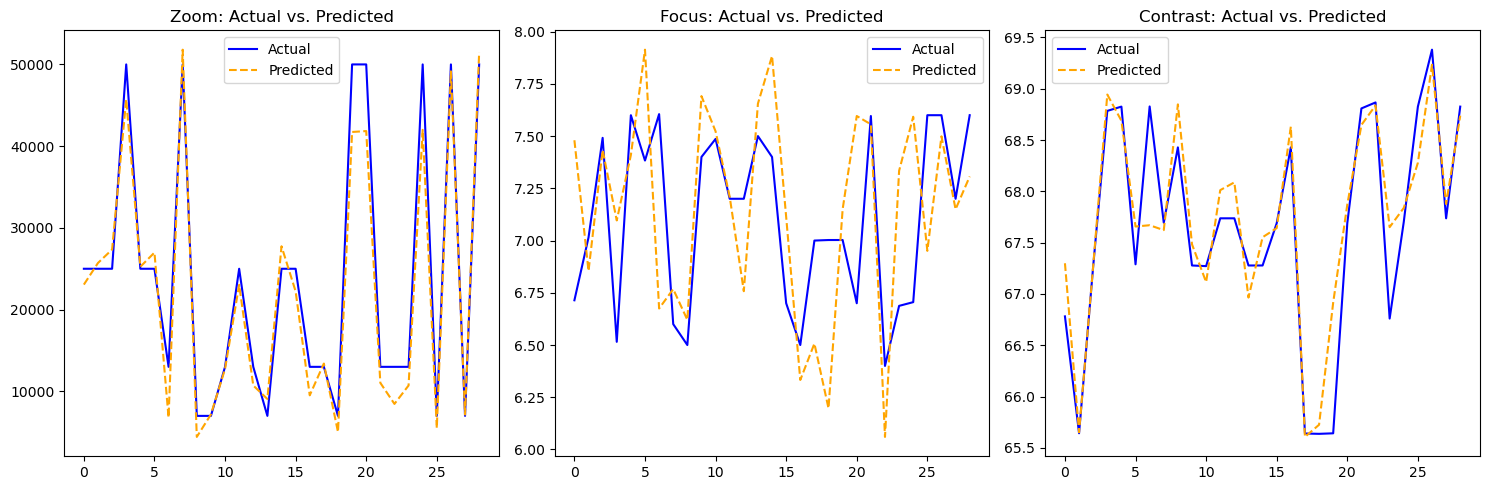

In [17]:
import matplotlib.pyplot as plt

#x_values = list(range(len(actual_zoom)))  # Assuming all lists are of the same length
#x_values1 = list(range(len(actual_focus))) 
#x_values2 = list(range(len(actual_contrast))) 

# Sample data
#actual_zoom = [1, 2, 3, 4, 5]
#predicted_zoom = [1.1, 1.9, 3.2, 4.1, 4.9]

#actual_zoom = Y_test['Zoom']
actual_zoom = Y_test[:,0]
x_values = list(range(len(actual_zoom)))  # Assuming all lists are of the same length
predicted_zoom = predicted_actual_values[:,0]


#actual_focus = Y_test['Focus']
actual_focus = Y_test[:,1]
x_values1 = list(range(len(actual_focus))) 
predicted_focus = predicted_actual_values[:,1]

#actual_contrast = Y_test['Contrast']
actual_contrast = Y_test[:,2]
x_values2 = list(range(len(actual_contrast))) 
predicted_contrast = predicted_actual_values[:,2]

# Plotting
plt.figure(figsize=(15, 5))

# Zoom
plt.subplot(1, 3, 1)
#plt.scatter(actual_zoom, predicted_zoom, color='blue', label='Predicted')
#plt.plot([min(actual_zoom), max(actual_zoom)], [min(actual_zoom), max(actual_zoom)], color='red', label='Ideal')
plt.plot(x_values, actual_zoom, color='blue', label='Actual')
plt.plot(x_values, predicted_zoom, color='orange', linestyle='--', label='Predicted')
plt.title("Zoom: Actual vs. Predicted")
#plt.xlabel("Actual Zoom")
#plt.ylabel("Predicted Zoom")
plt.legend()

# Focus
plt.subplot(1, 3, 2)
#plt.scatter(actual_focus, predicted_focus, color='blue', label='Predicted')
#plt.plot([min(actual_focus), max(actual_focus)], [min(actual_focus), max(actual_focus)], color='red', label='Ideal')
plt.plot(x_values1, actual_focus, color='blue', label='Actual')
plt.plot(x_values1, predicted_focus, color='orange', linestyle='--', label='Predicted')
plt.title("Focus: Actual vs. Predicted")
#plt.xlabel("Actual Focus")
#plt.ylabel("Predicted Focus")
plt.legend()

# Contrast
plt.subplot(1, 3, 3)
#plt.scatter(actual_contrast, predicted_contrast, color='blue', label='Predicted')
#plt.plot([min(actual_contrast), max(actual_contrast)], [min(actual_contrast), max(actual_contrast)], color='red', label='Ideal')
plt.plot(x_values2, actual_contrast, color='blue', label='Actual')
plt.plot(x_values2, predicted_contrast, color='orange', linestyle='--', label='Predicted')
plt.title("Contrast: Actual vs. Predicted")
#plt.xlabel("Actual Contrast")
#plt.ylabel("Predicted Contrast")
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Save the entire model including architecture, weights, and optimizer state
model2.save("IL_trained_model_v2.h5")

In [19]:
# Test the loaded model
from tensorflow.keras.models import load_model

# Load the entire model
loaded_model = load_model("IL_trained_model_v2.h5")

In [20]:
#Load custom input data
# Import dataset

df_test = pd.read_csv("TestData.csv") #reading the provided dataset
df_test.head()
scale_testdata = StandardScaler()

# Fit the scaler on the original training values to learn the mean and standard deviation
scale_testdata.fit(X_test)

# Save the fitted scaler to a file using joblib
joblib.dump(scale_testdata, 'scale_testdata.pkl')
TestData = scale_testdata.transform(df_test)
TestData

array([[ 0.3996857 , -0.37723648, -0.2013607 ,  0.39453831, -1.16207511],
       [-0.96035944, -1.25657267,  0.72307299,  1.35493974, -1.13659549],
       [-0.13890975, -0.04382108, -0.48310826, -0.06911534, -0.7798808 ],
       [-0.72051651, -1.40466973,  1.14865727,  1.82884081, -1.3977616 ],
       [ 0.29601   , -0.38721819, -0.02062206,  0.22789178, -0.39131658],
       [-1.38525851, -1.19859994,  1.42394026,  0.59159111,  0.99095285],
       [ 1.31187757,  0.45016854, -0.93077982, -0.29808633, -1.42324122],
       [ 1.04395981,  0.69440524, -0.89037625, -0.62029203, -0.30850781],
       [ 0.04203508,  0.98807768, -0.99865782, -0.81549693, -0.14289028],
       [-0.77027307, -0.40904662,  0.23445915,  0.06141324,  0.41766138]])

In [21]:
# Now we can use the loaded_model to make predictions on your test data
predictions = model2.predict(TestData)

1/1 [==============================] - 0s 14ms/step


In [22]:
# Load the scaler from the saved file
loaded_scaler = joblib.load('scaler_originalval.pkl')

# Use the scaler to transform the predicted values back to their original scale
predictions_testdata = loaded_scaler.inverse_transform(predictions)

print("Predicted Zoom, Focus, Contrast (Actual Values):")
print(predictions_testdata)

Predicted Zoom, Focus, Contrast (Actual Values):
[[2.1710621e+04 6.1790309e+00 6.8929832e+01]
 [4.3699918e+04 7.2661109e+00 6.8523415e+01]
 [2.1759262e+04 6.8399158e+00 6.7856842e+01]
 [4.9319180e+04 6.4465256e+00 6.9392853e+01]
 [2.2122727e+04 6.1949096e+00 6.8843987e+01]
 [4.5934176e+04 6.9459634e+00 6.7028366e+01]
 [8.1072568e+03 6.2194281e+00 6.8701950e+01]
 [1.0372207e+04 7.4517455e+00 6.8737587e+01]
 [8.2946680e+03 7.7040062e+00 6.7057861e+01]
 [2.7338906e+04 7.2092552e+00 6.7588333e+01]]
